In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os

# List the contents of your mounted Google Drive
# Replace 'My Drive' with the actual path if your dataset folder is not directly in My Drive
drive_path = '/content/drive/My Drive'
if os.path.exists(drive_path):
    print(f"Contents of {drive_path}:")
    for item in os.listdir(drive_path):
        print(item)
else:
    print(f"Drive path not found: {drive_path}")

Contents of /content/drive/My Drive:
Getting started.pdf
Document from Himanshu.pdf
Colab Notebooks
collab-data.zip
api-hugging.gdoc
Complaints_by_press_problems.gdoc
Untitled document (1).gdoc
Untitled document.gdoc
Updating_issues_as_per_regex.gdoc
Indian_cities_with_states.gdoc
dataset
Himanshu_resume_aug_25.pdf


In [ ]:
!pip install torch torchvision scikit-learn matplotlib tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
# @title
# # @title
# import os
# import torch
# import torch.nn as nn
# import torchvision.transforms as transforms
# import torchvision.models as models
# from torchvision.datasets import ImageFolder
# from torch.utils.data import DataLoader, Subset
# from sklearn.model_selection import KFold
# import numpy as np
# from PIL import Image

# # ==== CONFIG ====
# DATA_DIR = "/content/drive/MyDrive/dataset"
# NUM_CLASSES = 3
# BATCH_SIZE = 16
# NUM_EPOCHS = 10
# K_FOLDS = 5
# DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# MODEL_SAVE_PATH = "resnet50_finetuned.pth"
# CLASS_NAMES = ['gond', 'kerala_mural', 'warli','kangra']  # make sure folder names match

# # ==== TRANSFORMS ====
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),  # ResNet50 expects 224x224
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225])
# ])

# # ==== DATASET ====
# dataset = ImageFolder(root=DATA_DIR, transform=transform)

# # ==== MODEL ====
# def get_model():
#     model = models.resnet50(pretrained=True)
#     for param in model.parameters():
#         param.requires_grad = False  # freeze base
#     model.fc = nn.Linear(model.fc.in_features, NUM_CLASSES)
#     return model.to(DEVICE)

# # ==== TRAIN FUNCTION ====
# def train_model(train_loader, val_loader, fold):
#     model = get_model()
#     criterion = nn.CrossEntropyLoss()
#     optimizer = torch.optim.Adam(model.fc.parameters(), lr=1e-4)  # only train classifier

#     for epoch in range(NUM_EPOCHS):
#         model.train()
#         for images, labels in train_loader:
#             images, labels = images.to(DEVICE), labels.to(DEVICE)
#             outputs = model(images)
#             loss = criterion(outputs, labels)

#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#     # Evaluate
#     model.eval()
#     correct, total = 0, 0
#     with torch.no_grad():
#         for images, labels in val_loader:
#             images, labels = images.to(DEVICE), labels.to(DEVICE)
#             outputs = model(images)
#             _, predicted = torch.max(outputs, 1)
#             correct += (predicted == labels).sum().item()
#             total += labels.size(0)

#     acc = 100 * correct / total
#     print(f"Fold {fold}, Validation Accuracy: {acc:.2f}%")

#     return model

# # ==== K-FOLD TRAINING ====
# def run_kfold_training():
#     kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)
#     for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
#         print(f"\n--- Fold {fold + 1}/{K_FOLDS} ---")
#         train_subset = Subset(dataset, train_idx)
#         val_subset = Subset(dataset, val_idx)

#         train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True)
#         val_loader = DataLoader(val_subset, batch_size=BATCH_SIZE)

#         model = train_model(train_loader, val_loader, fold)

#         if fold == 0:  # Save only one model for inference
#             torch.save(model.state_dict(), MODEL_SAVE_PATH)

# # ==== INFERENCE FUNCTION ====
# def predict_image(image_path):
#     model = get_model()
#     model.load_state_dict(torch.load(MODEL_SAVE_PATH, map_location=DEVICE))
#     model.eval()

#     image = Image.open(image_path).convert("RGB")
#     image = transform(image).unsqueeze(0).to(DEVICE)

#     with torch.no_grad():
#         output = model(image)
#         _, predicted = torch.max(output, 1)

#     return CLASS_NAMES[predicted.item()]


In [ ]:
# @title
# # @title
# run_kfold_training()



--- Fold 1/5 ---


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 139MB/s]
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Fold 0, Validation Accuracy: 93.75%

--- Fold 2/5 ---
Fold 1, Validation Accuracy: 97.92%

--- Fold 3/5 ---
Fold 2, Validation Accuracy: 89.58%

--- Fold 4/5 ---


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Fold 3, Validation Accuracy: 93.62%

--- Fold 5/5 ---


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Fold 4, Validation Accuracy: 93.62%


In [ ]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# ==== CONFIG ====
DATA_DIR = "/content/drive/MyDrive/dataset"
NUM_CLASSES = 3   # <-- you have 4 classes now
BATCH_SIZE = 16
NUM_EPOCHS = 15
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_SAVE_PATH = "resnet50_finetuned.pth"
CLASS_NAMES = ['gond', 'kangra','warli']  # make sure folder names match

# ==== TRANSFORMS ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet50 expects 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ==== DATASET ====
dataset = ImageFolder(root=DATA_DIR, transform=transform)

# Split into train (70%) and test (30%)
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ==== MODEL ====
def get_model():
    model = models.resnet50(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False  # freeze base
    model.fc = nn.Linear(model.fc.in_features, NUM_CLASSES)
    return model.to(DEVICE)

# ==== TRAIN FUNCTION ====
from tqdm import tqdm

def train_model():
    model = get_model()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.fc.parameters(), lr=1e-4)

    train_losses = []
    test_accuracies = []

    for epoch in range(NUM_EPOCHS):
        model.train()
        running_loss = 0.0

        # tqdm loop for batches
        loop = tqdm(train_loader, leave=False, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}")
        for images, labels in loop:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Update tqdm progress bar
            loop.set_postfix(loss=loss.item())

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)

        # --- Evaluate on test set after each epoch ---
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(DEVICE), labels.to(DEVICE)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        acc = 100 * correct / total
        test_accuracies.append(acc)

        print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] - Loss: {avg_loss:.4f}, Test Acc: {acc:.2f}%")

    # Save trained model
    torch.save(model.state_dict(), MODEL_SAVE_PATH)

    # --- Plot training curves ---
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(range(1, NUM_EPOCHS+1), train_losses, marker='o', label='Train Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.grid()
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(1, NUM_EPOCHS+1), test_accuracies, marker='s', color='orange', label='Test Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Test Accuracy")
    plt.grid()
    plt.legend()

    plt.show()

    return model
# ==== EVALUATE MODEL ====
def evaluate_model(model):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))

# ==== INFERENCE FUNCTION ====
def predict_images(images):  # images is a list of PIL.Image objects
    model = get_model()
    model.load_state_dict(torch.load(MODEL_SAVE_PATH, map_location=DEVICE))
    model.eval()

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

    image_tensors = [transform(img.convert("RGB")).unsqueeze(0) for img in images]
    batch_tensor = torch.cat(image_tensors).to(DEVICE)

    with torch.no_grad():
        outputs = model(batch_tensor)
        _, preds = torch.max(outputs, 1)

    return [CLASS_NAMES[p.item()] for p in preds]


Epoch 1/15:  36%|███▋      | 4/11 [00:02<00:03,  1.87it/s, loss=1.2]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [1/15] - Loss: 1.1378, Test Acc: 41.89%


Epoch [2/15] - Loss: 1.0339, Test Acc: 59.46%


Epoch [3/15] - Loss: 0.9524, Test Acc: 77.03%


Epoch [4/15] - Loss: 0.8765, Test Acc: 87.84%


Epoch [5/15] - Loss: 0.7979, Test Acc: 86.49%


Epoch [6/15] - Loss: 0.7350, Test Acc: 91.89%


Epoch [7/15] - Loss: 0.6922, Test Acc: 94.59%


Epoch [8/15] - Loss: 0.6489, Test Acc: 94.59%


Epoch [9/15] - Loss: 0.6130, Test Acc: 97.30%


Epoch [10/15] - Loss: 0.5653, Test Acc: 94.59%


Epoch [11/15] - Loss: 0.5528, Test Acc: 98.65%


Epoch [12/15] - Loss: 0.5002, Test Acc: 97.30%


Epoch [13/15] - Loss: 0.4942, Test Acc: 97.30%


Epoch [14/15] - Loss: 0.4712, Test Acc: 98.65%


Epoch [15/15] - Loss: 0.4547, Test Acc: 97.30%


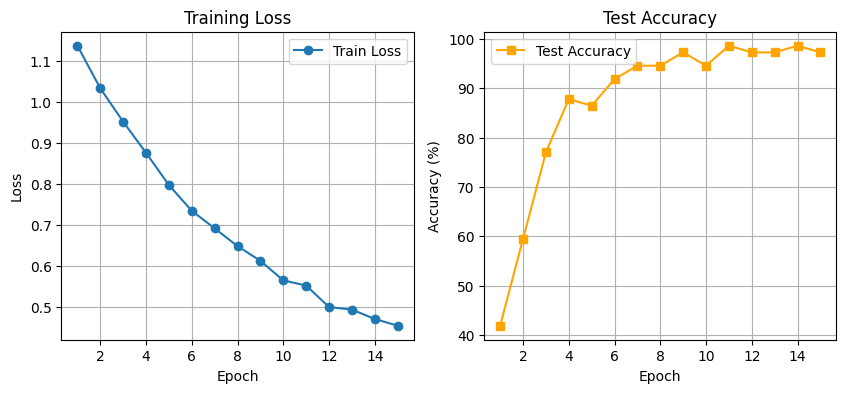

In [ ]:
model = train_model()


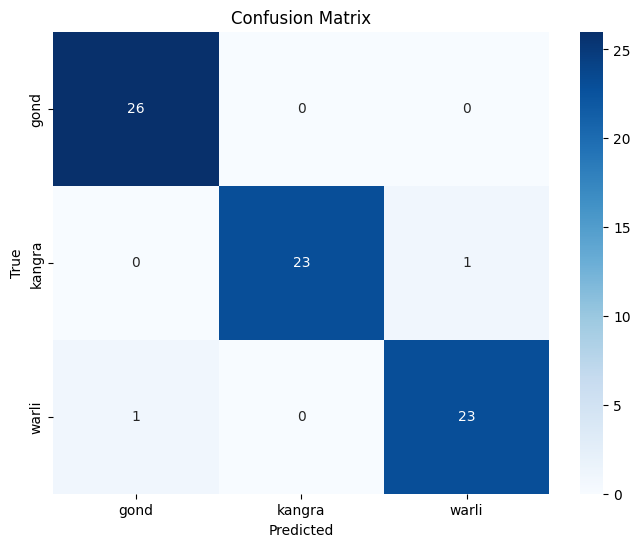


Classification Report:

              precision    recall  f1-score   support

        gond       0.96      1.00      0.98        26
      kangra       1.00      0.96      0.98        24
       warli       0.96      0.96      0.96        24

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74



In [ ]:
evaluate_model(model)


In [ ]:
!pip install huggingface_hub
from huggingface_hub import notebook_login

# Log in to Hugging Face
notebook_login()

In [ ]:
!pip install -U diffusers
from PIL import Image
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.34.0
    Uninstalling diffusers-0.34.0:
      Successfully uninstalled diffusers-0.34.0


In [ ]:
from diffusers import DiffusionPipeline

pipe_k = DiffusionPipeline.from_pretrained("himanshu0510/kangra_style_loss-art-fine-tuned")
import torch

# Move the pipe to CUDA if available
if torch.cuda.is_available():
  pipe_k = pipe_k.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:30: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:


prompt = f" A image of sks kangra : Mythological figures in vibrant attire converse amidst lush landscapes, featuring delicate trees and detailed architecture. Intricate line work, bold folk colors, and symbolic motifs embody the essence of Kangra art, capturing an enchanting narrative scene."

# Tune the guidance to control how closely the generations follow the prompt
# Values between 7-11 usually work best
guidance_scale = 11

num_cols = 4
all_images = []
for _ in range(num_cols):
    images = pipe_k(prompt, guidance_scale=guidance_scale).images
    all_images.extend(images)

image_grid(all_images, 1, num_cols)

  0%|          | 0/50 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 10.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 2343 has 14.73 GiB memory in use. Of the allocated memory 14.42 GiB is allocated by PyTorch, and 186.41 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
predict_images(all_images)

['kangra', 'kangra', 'kangra', 'kangra']

In [ ]:
from diffusers import DiffusionPipeline

pipe_g = DiffusionPipeline.from_pretrained("himanshu0510/gond-sl-art-fine-tuned")
import torch

# Move the pipe to CUDA if available
if torch.cuda.is_available():
  pipe_g = pipe_g.to("cuda")

model_index.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:30: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

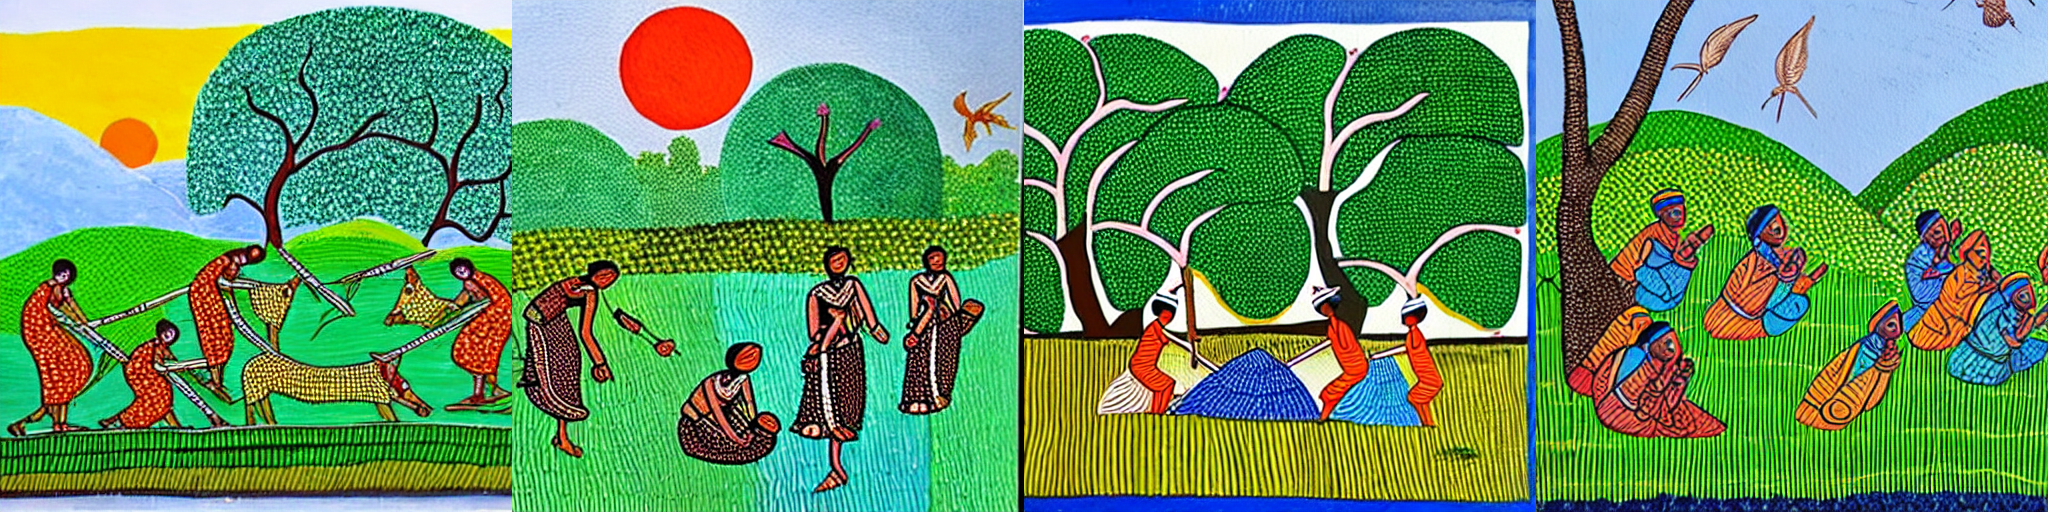

In [ ]:


prompt = f" A painting of sks gond :Indian villagers harvesting rice in a lush green paddy field embodying the essence of traditional Gond tribal artistry."

# Tune the guidance to control how closely the generations follow the prompt
# Values between 7-11 usually work best
guidance_scale = 11

num_cols = 4
all_images_g = []
for _ in range(num_cols):
    images = pipe_g(prompt, guidance_scale=guidance_scale).images
    all_images_g.extend(images)

image_grid(all_images_g, 1, num_cols)

In [ ]:
predict_images(all_images_g)

['gond', 'gond', 'gond', 'gond']

In [ ]:
from diffusers import DiffusionPipeline

pipe_w = DiffusionPipeline.from_pretrained("himanshu0510/warli_style_loss-art-fine-tuned")
import torch

# Move the pipe to CUDA if available
if torch.cuda.is_available():
  pipe_w = pipe_w.to("cuda")

model_index.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/model.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:30: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


OutOfMemoryError: CUDA out of memory. Tried to allocate 58.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 48.12 MiB is free. Process 2343 has 14.69 GiB memory in use. Of the allocated memory 14.37 GiB is allocated by PyTorch, and 195.92 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:


prompt = f" A painting of sks warli :Indian villagers harvesting rice in a paddy field."

# Tune the guidance to control how closely the generations follow the prompt
# Values between 7-11 usually work best
guidance_scale = 11

num_cols = 4
all_images_w = []
for _ in range(num_cols):
    images = pipe_w(prompt, guidance_scale=guidance_scale).images
    all_images_w.extend(images)

image_grid(all_images_w, 1, num_cols)